In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [196]:
df=pd.read_csv("C:/Users/yako_/Downloads/2015.csv")
df2=pd.read_csv("C:/Users/yako_/Downloads/2016.csv")
df3=pd.read_csv("C:/Users/yako_/Downloads/2017.csv")
df4=pd.read_csv("C:/Users/yako_/Downloads/2018.csv")
df5=pd.read_csv("C:/Users/yako_/Downloads/2019.csv")

In [11]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [14]:
df.describe().transpose()

count       mean        std      min  \
Happiness Rank                 158.0  79.493671  45.754363  1.00000   
Happiness Score                158.0   5.375734   1.145010  2.83900   
Standard Error                 158.0   0.047885   0.017146  0.01848   
Economy (GDP per Capita)       158.0   0.846137   0.403121  0.00000   
Family                         158.0   0.991046   0.272369  0.00000   
Health (Life Expectancy)       158.0   0.630259   0.247078  0.00000   
Freedom                        158.0   0.428615   0.150693  0.00000   
Trust (Government Corruption)  158.0   0.143422   0.120034  0.00000   
Generosity                     158.0   0.237296   0.126685  0.00000   
Dystopia Residual              158.0   2.098977   0.553550  0.32858   

                                     25%        50%         75%        max  
Happiness Rank                 40.250000  79.500000  118.750000  158.00000  
Happiness Score                 4.526000   5.232500    6.243750    7.58700  
Standard Error                  0.037268   0.043940    0.052300    0.13693  
Economy (GDP per Capita)        0.545808   0.910245    1.158448    1.69042  
Family                          0.856823   1.029510    1.214405    1.40223  
Health (Life Expectancy)        0.439185   0.696705    0.811013    1.02525  
Freedom                         0.328330   0.435515    0.549092    0.66973  
Trust (Government Corruption)   0.061675   0.107220    0.180255    0.55191  
Generosity                      0.150553   0.216130    0.309883    0.79588  
Dystopia Residual               1.759410   2.095415    2.462415    3.60214

In [19]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

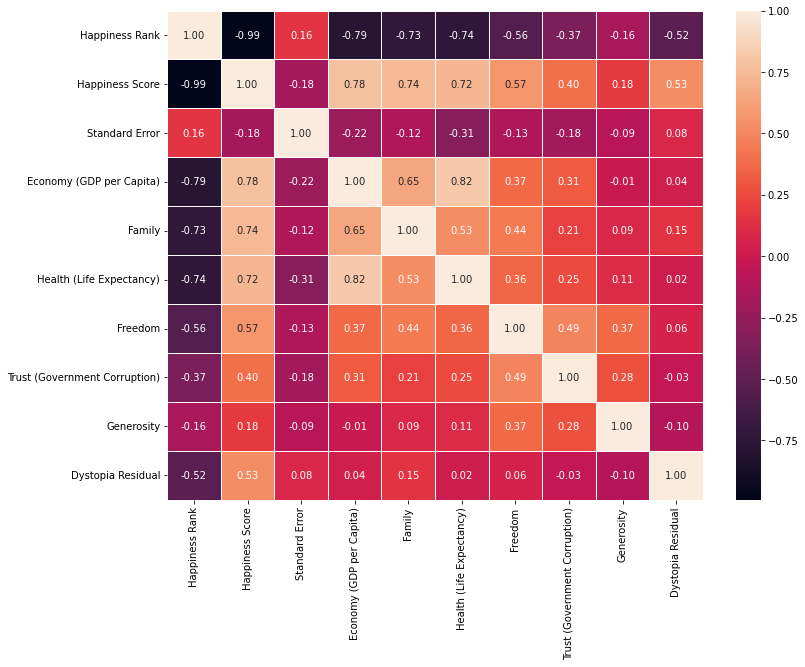

In [35]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=1);

In [21]:
df2

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              7.509                      7.428                      7.590   
2              7.501                      7.333                      7.669   
3              7.498                      7.421                      7.575   
4              7.413                      7.351                      7.475   
..               ...                        ...                        ...   
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                   0.86733  0.56624   
3                     1.57744  1.12690                   0.79579  0.59609   
4                     1.40598  1.13464                   0.81091  0.57104   
..                        ...      ...                       ...      ...   
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.44453     0.36171            2.73939  
1                          0.41203     0.28083            2.69463  
2                          0.14975     0.47678            2.83137  
3                          0.35776     0.37895            2.66465  
4                          0.41004     0.25492            2.82596  
..                             ...         ...                ...  
152                        0.06681     0.20180            2.10812  
153                        0.07112     0.31268            2.14558  
154                        0.11587     0.17517            2.13540  
155                        0.17233     0.48397            0.81789  
156                        0.09419     0.20290            2.10404  

[157 rows x 13 columns]

In [22]:
df2.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
df2["Region"].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

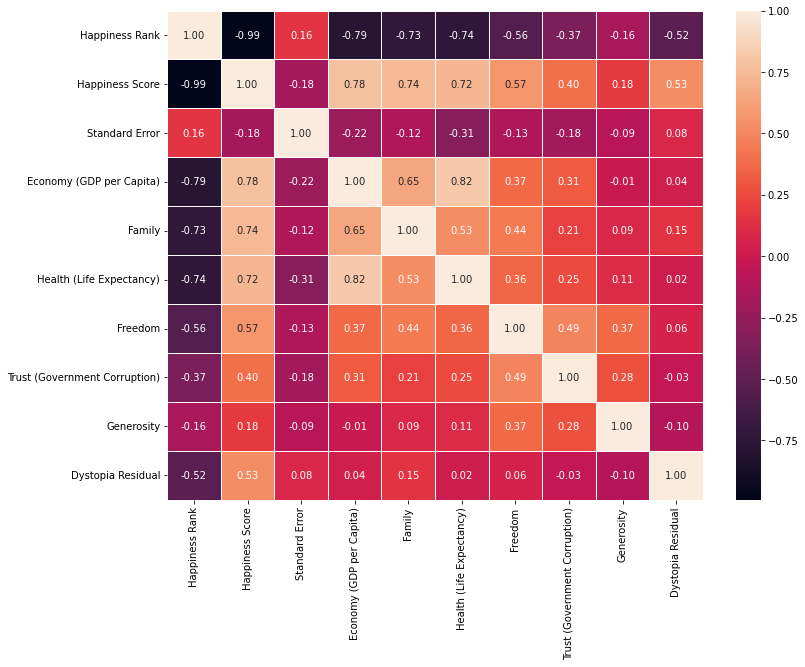

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=1);

In [25]:
df3

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
0                         0.315964           2.277027  
1                         0.400770           2.313707  
2                         0.153527           2.322715  
3                         0.367007           2.276716  
4                         0.382612           2.430182  
..                             ...                ...  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005  

[155 rows x 12 columns]

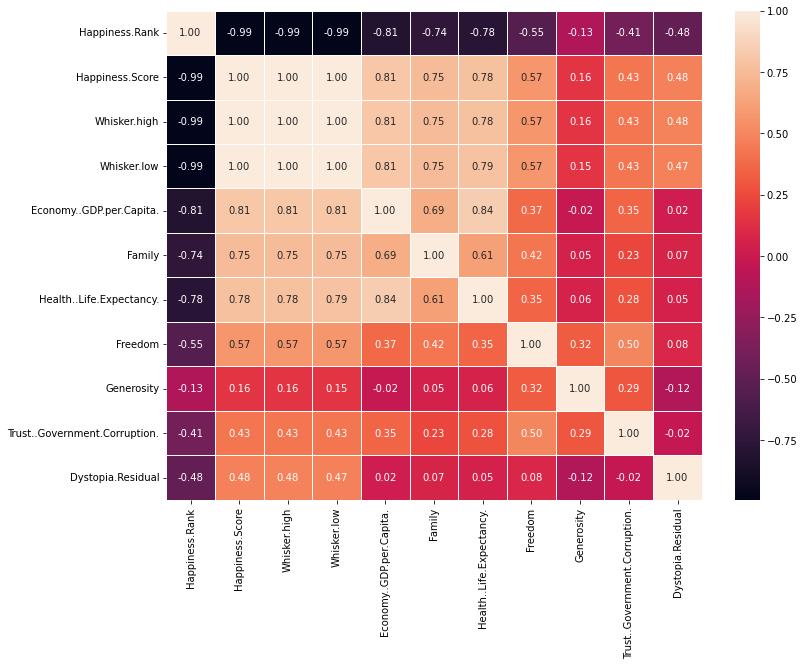

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(df3.corr(),annot=True,fmt=".2f",linewidths=1);

In [37]:
df4

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

In [43]:
df4.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [42]:
df4["Country or region"].value_counts()

Finland      1
Ghana        1
Nepal        1
Venezuela    1
Gabon        1
            ..
Latvia       1
Japan        1
Mauritius    1
Jamaica      1
Burundi      1
Name: Country or region, Length: 156, dtype: int64

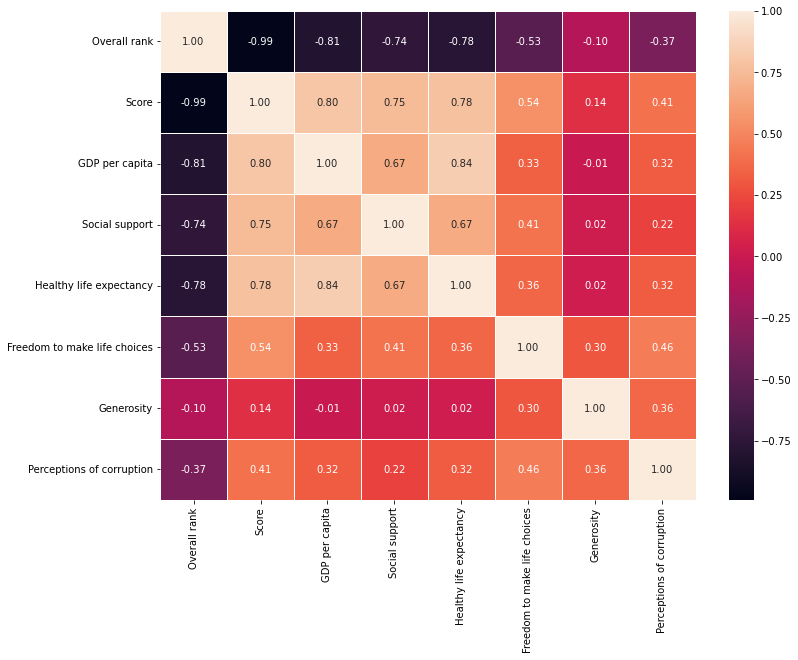

In [44]:
plt.figure(figsize=(12,9))
sns.heatmap(df4.corr(),annot=True,fmt=".2f",linewidths=1);

In [45]:
df5

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

In [46]:
df5.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

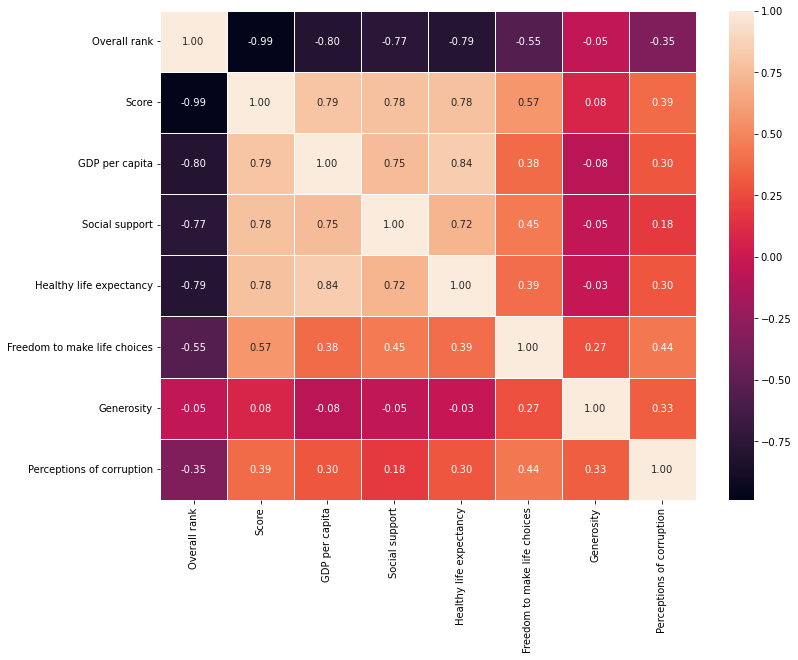

In [47]:
plt.figure(figsize=(12,9))
sns.heatmap(df5.corr(),annot=True,fmt=".2f",linewidths=1);

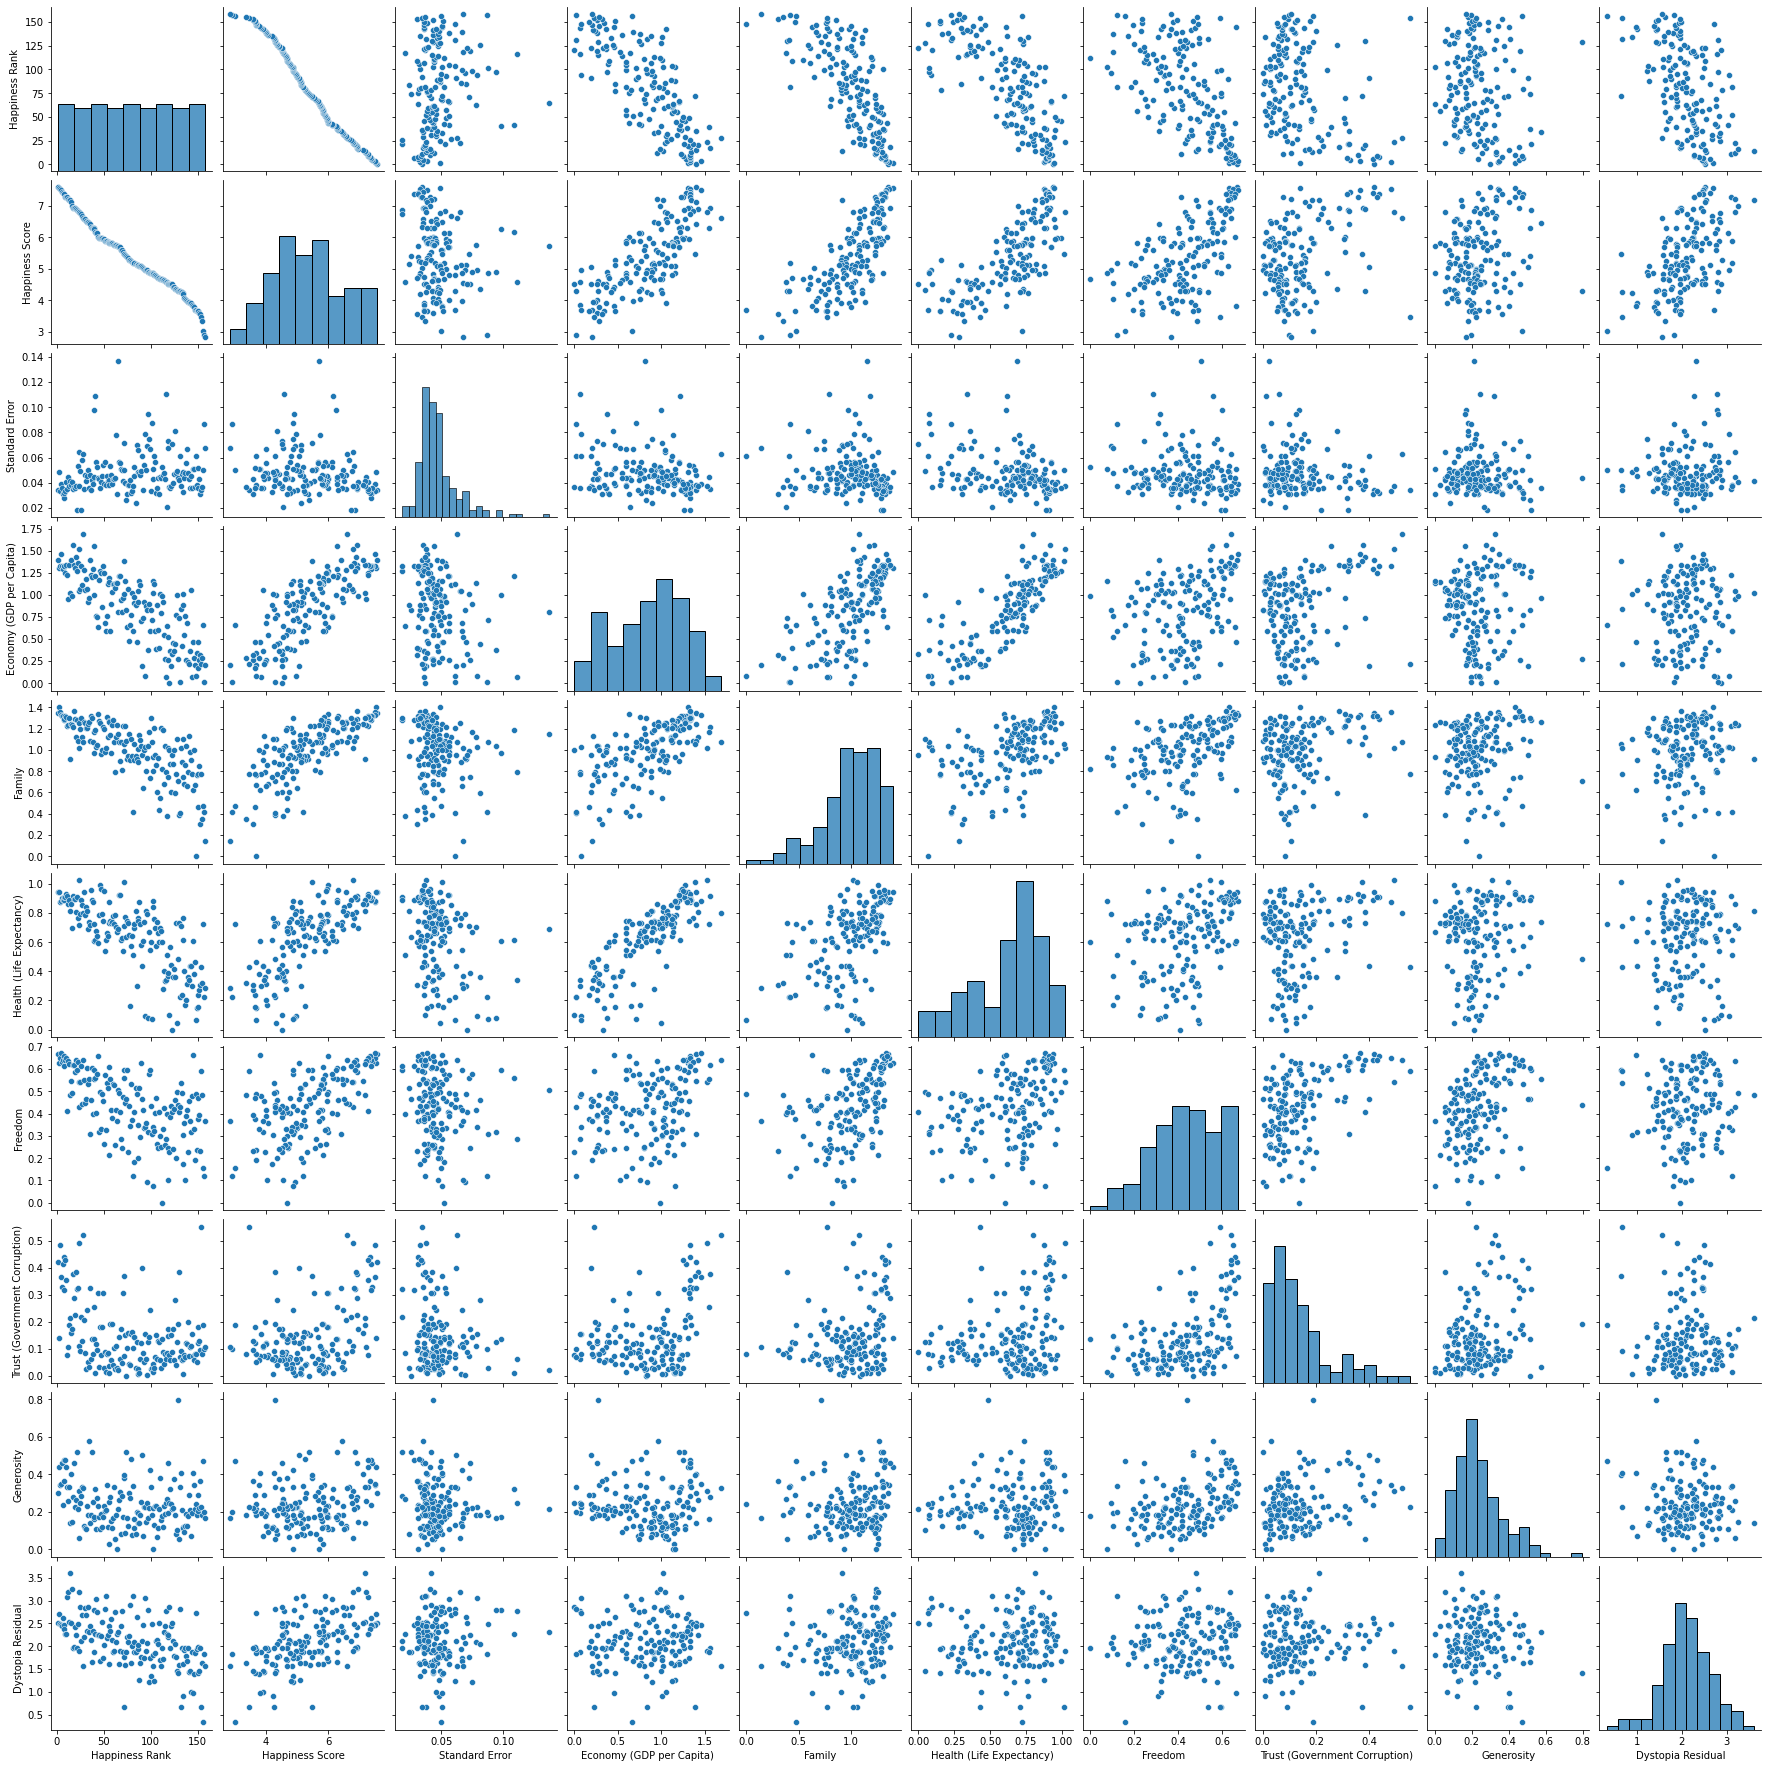

In [91]:
sns.pairplot(df,palette="viridis")

<Figure size 864x720 with 0 Axes>

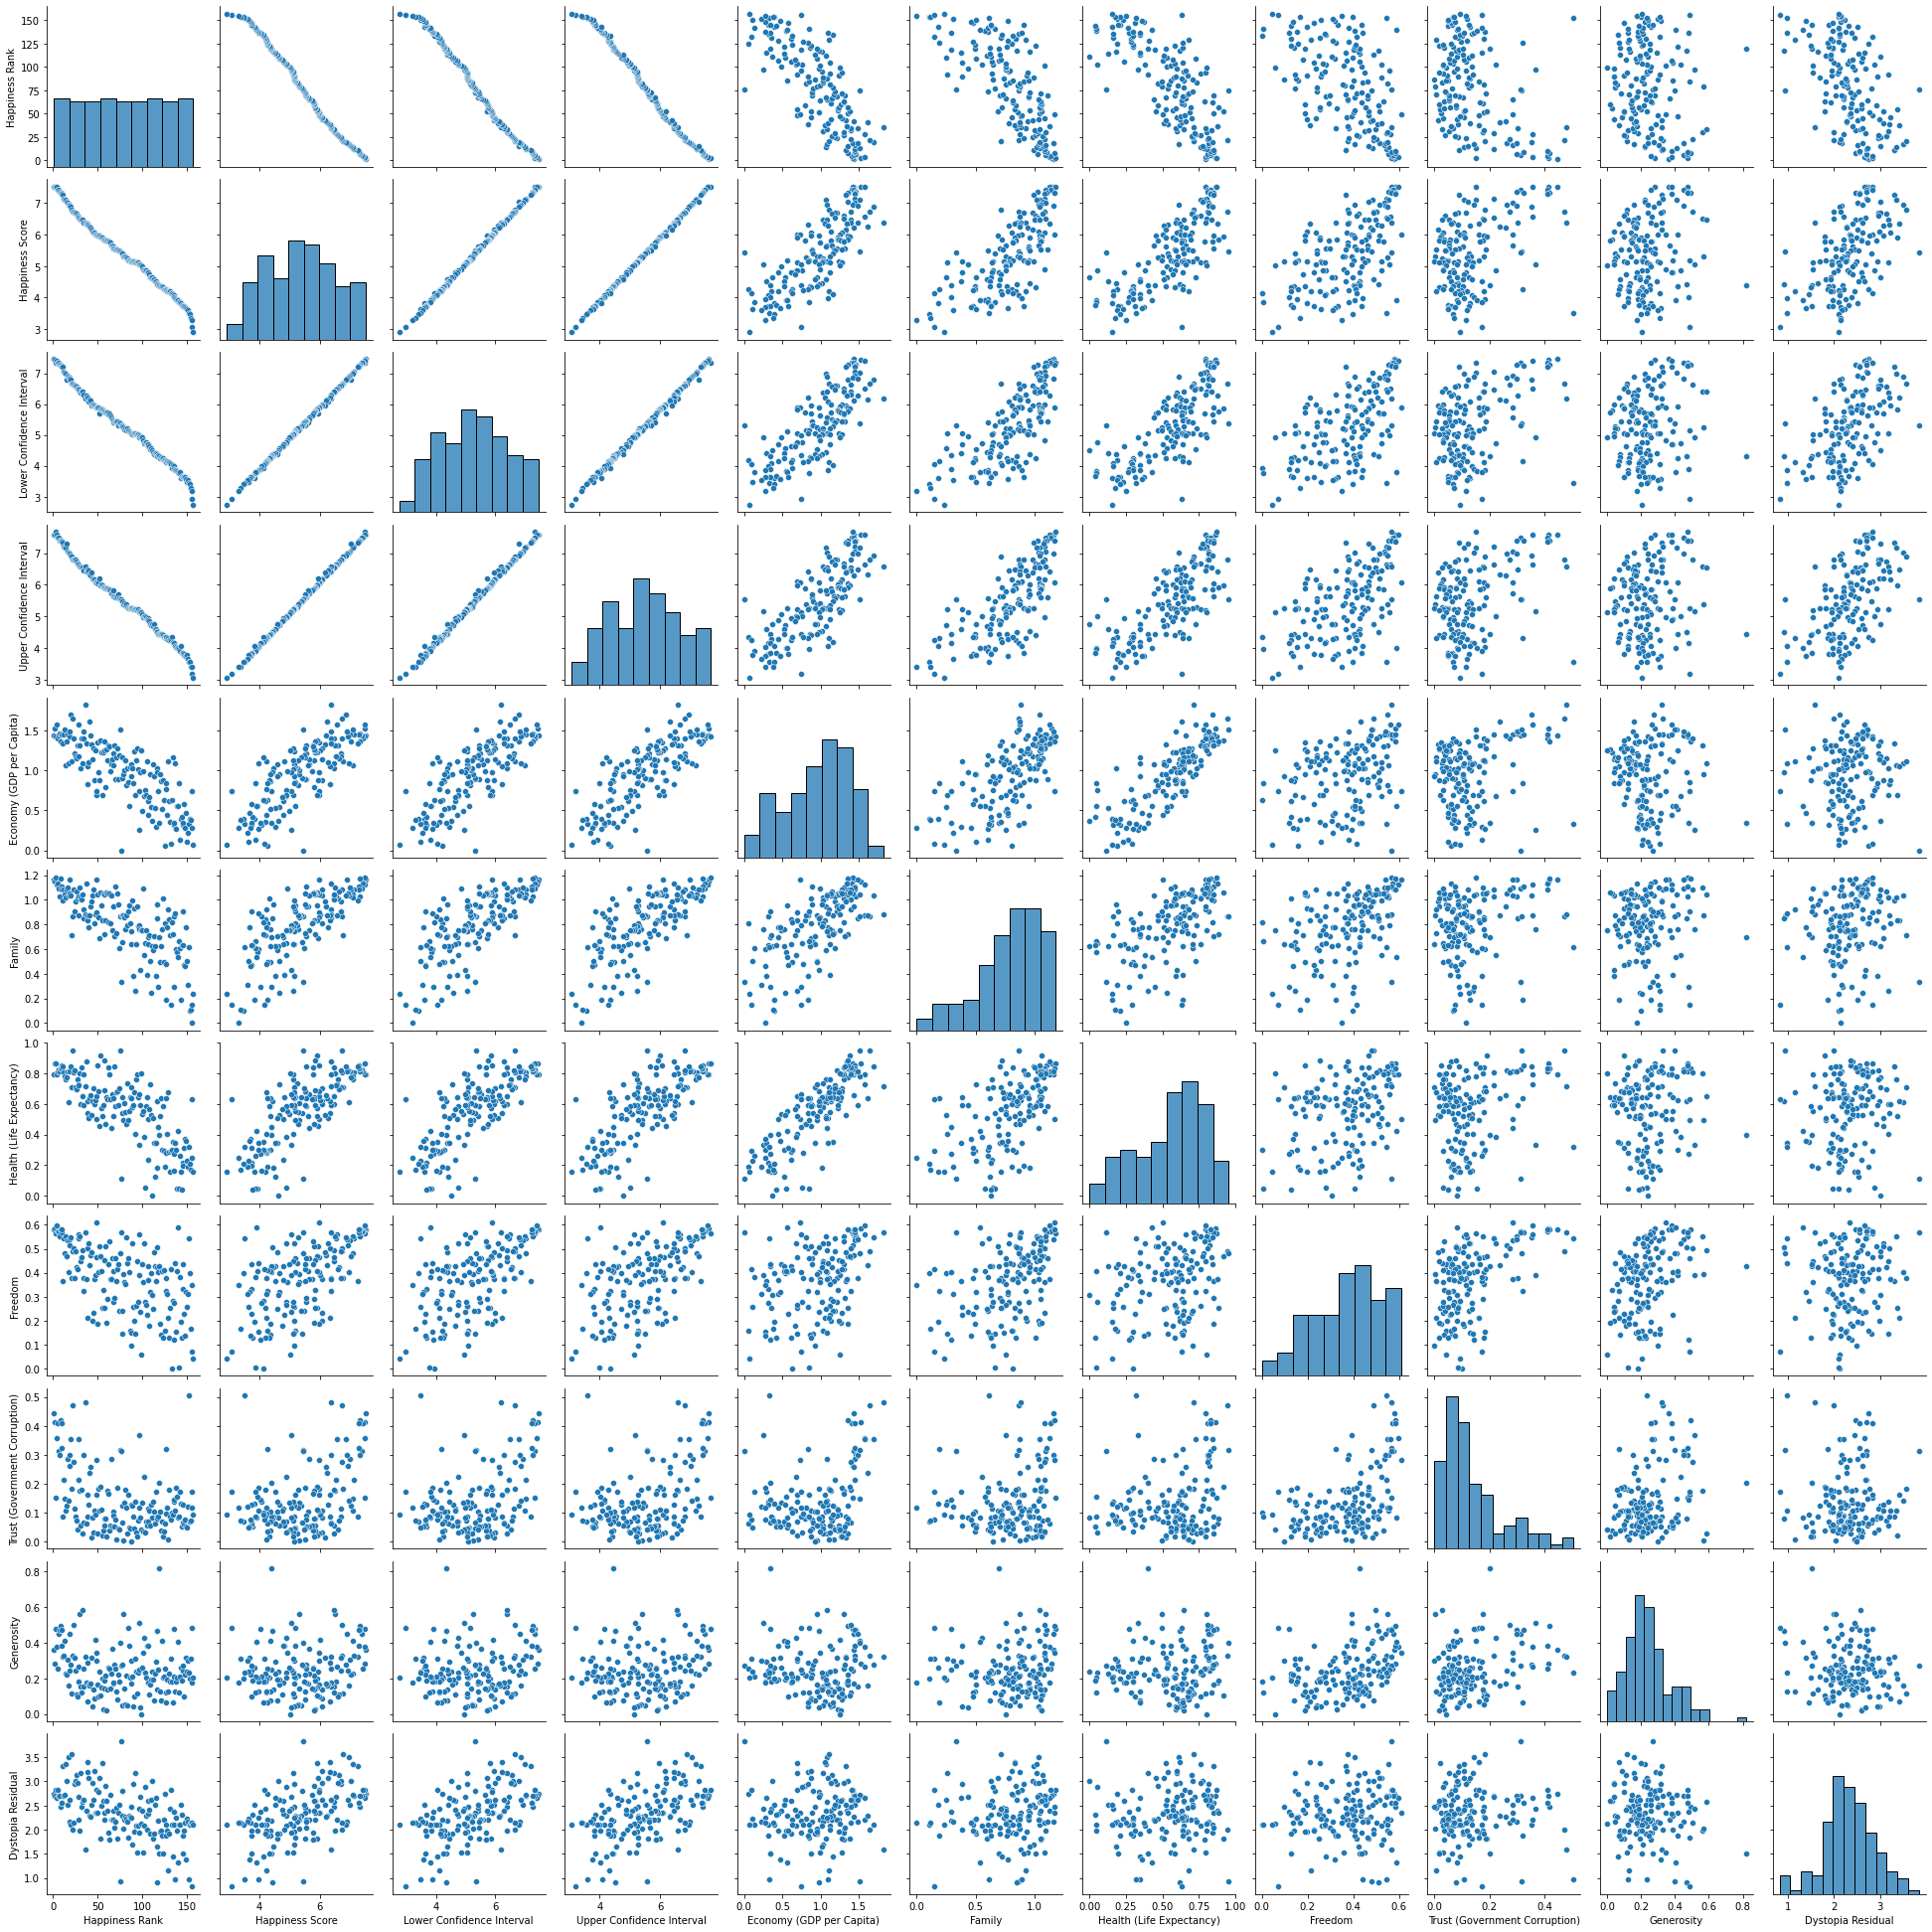

In [90]:
plt.figure(figsize=(12,10))
sns.pairplot(df2,palette="viridis");

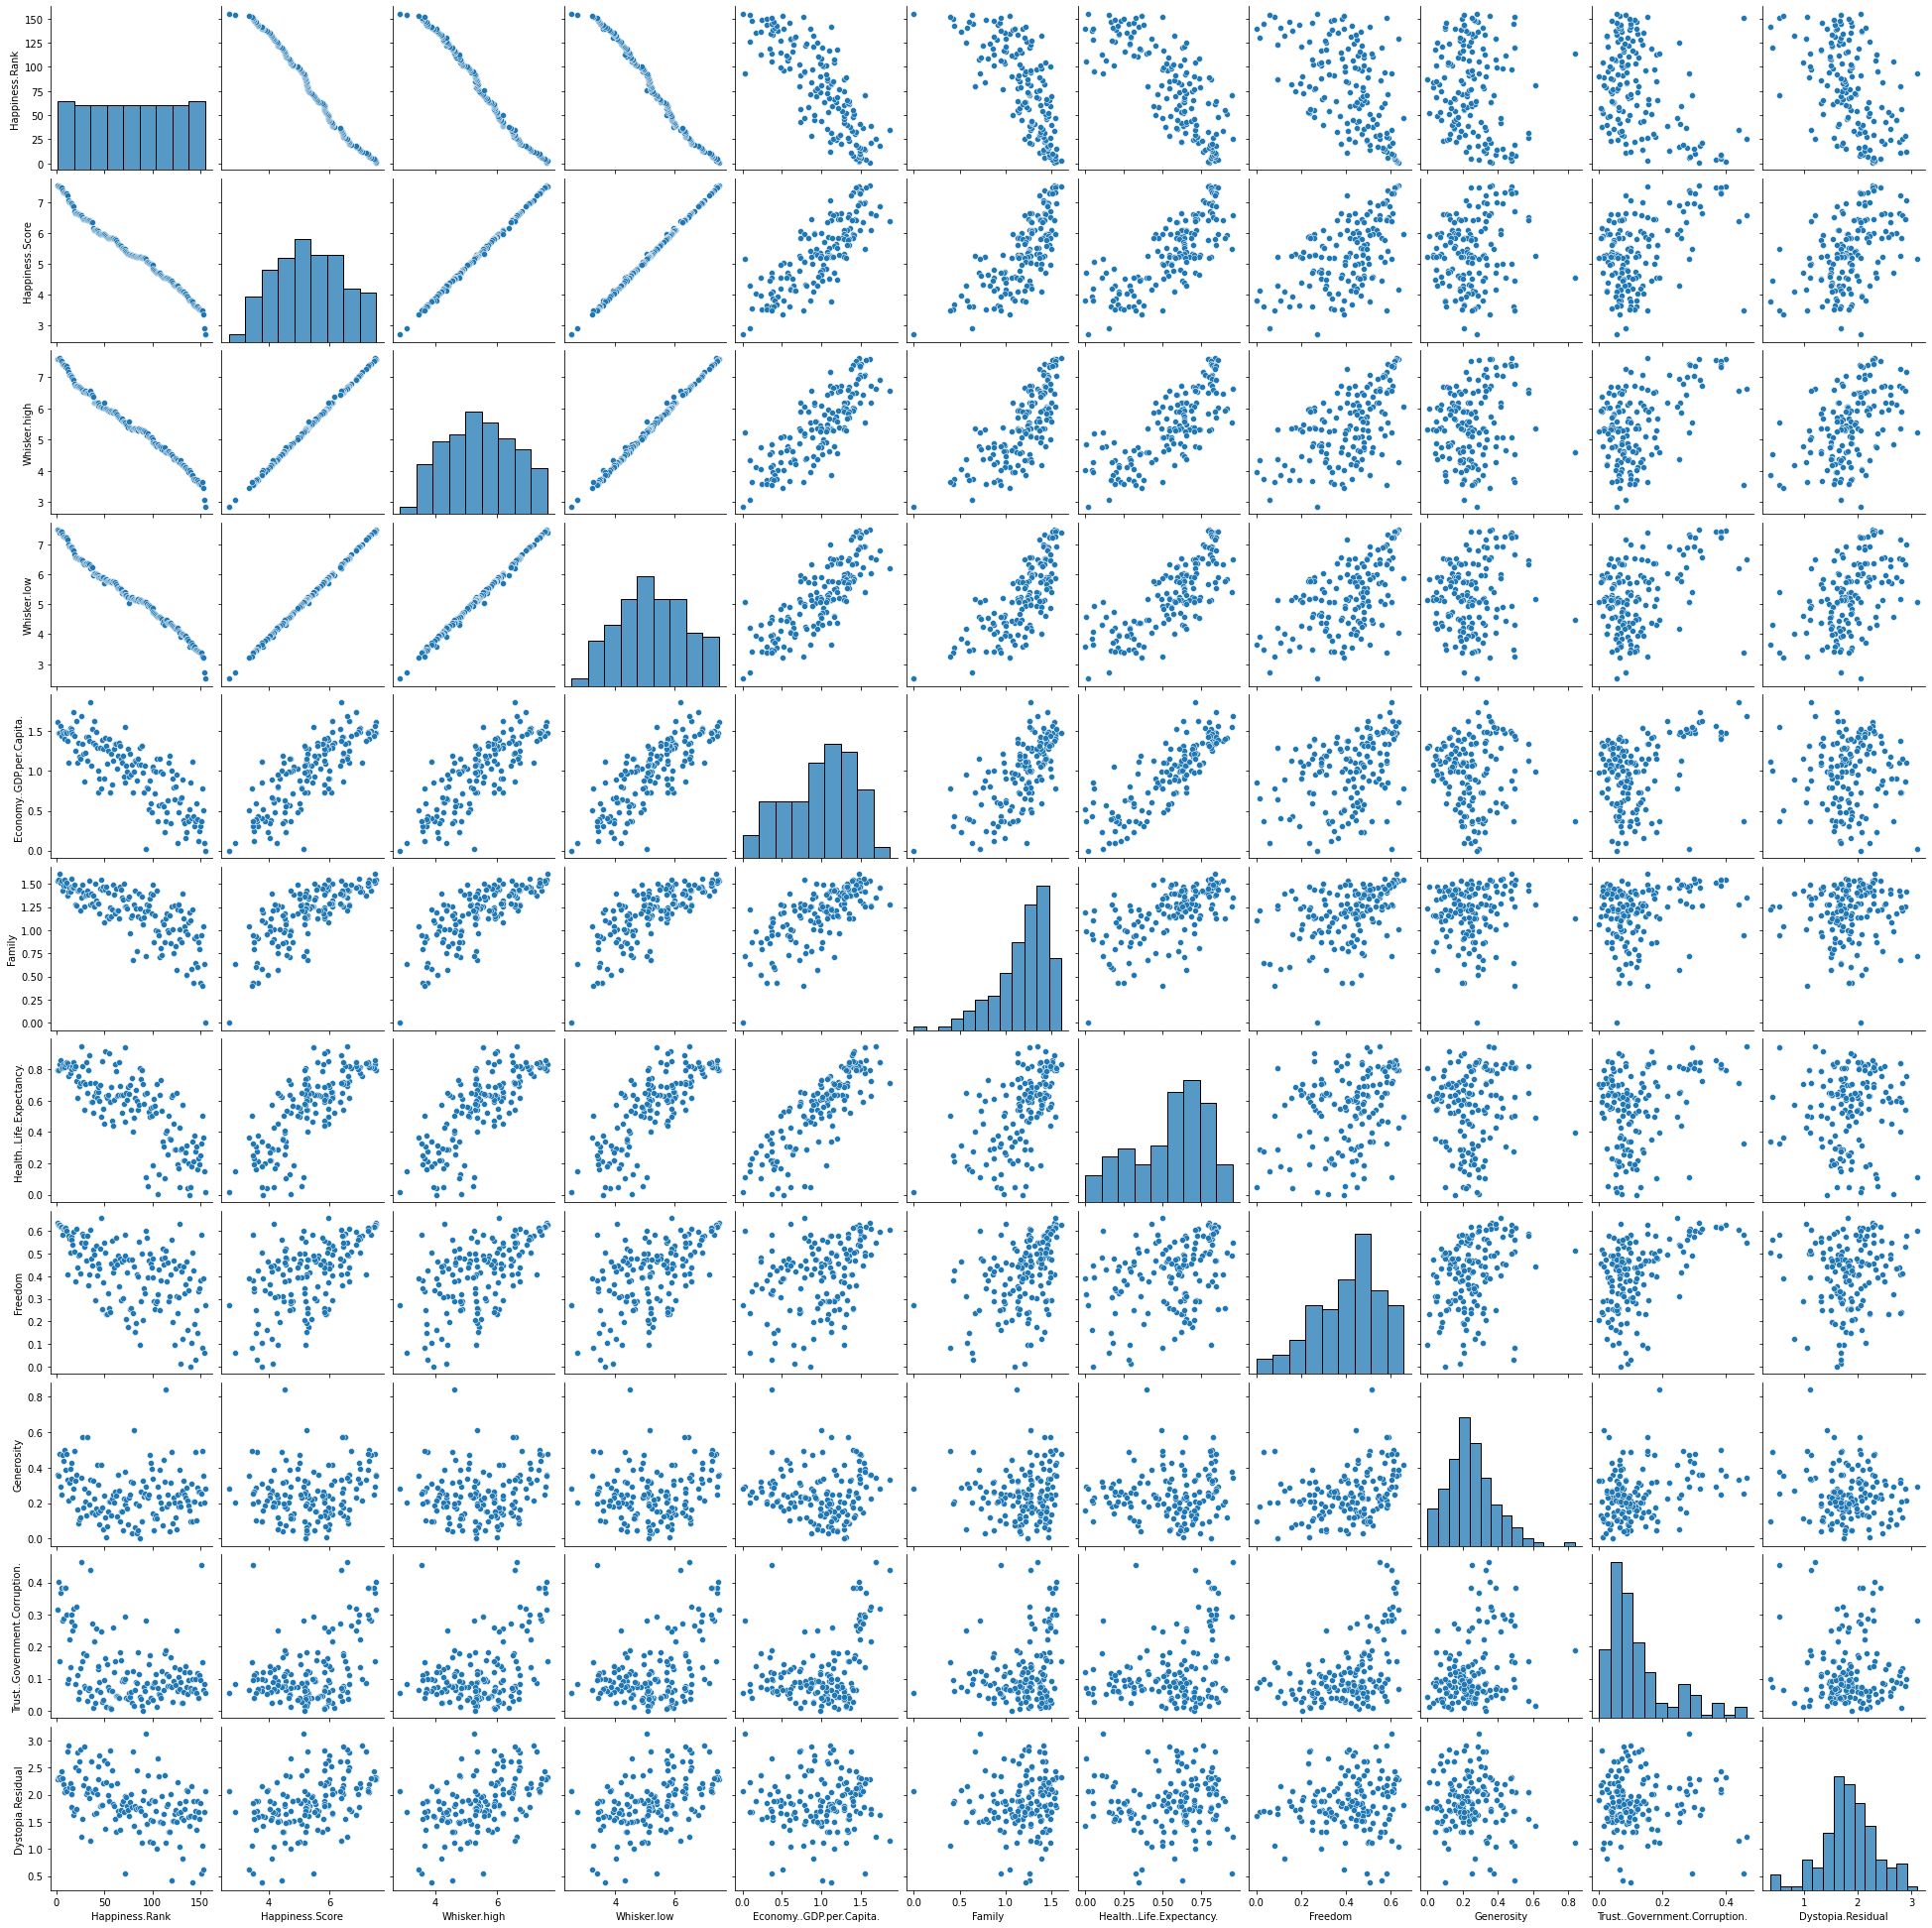

In [92]:
sns.pairplot(df3)

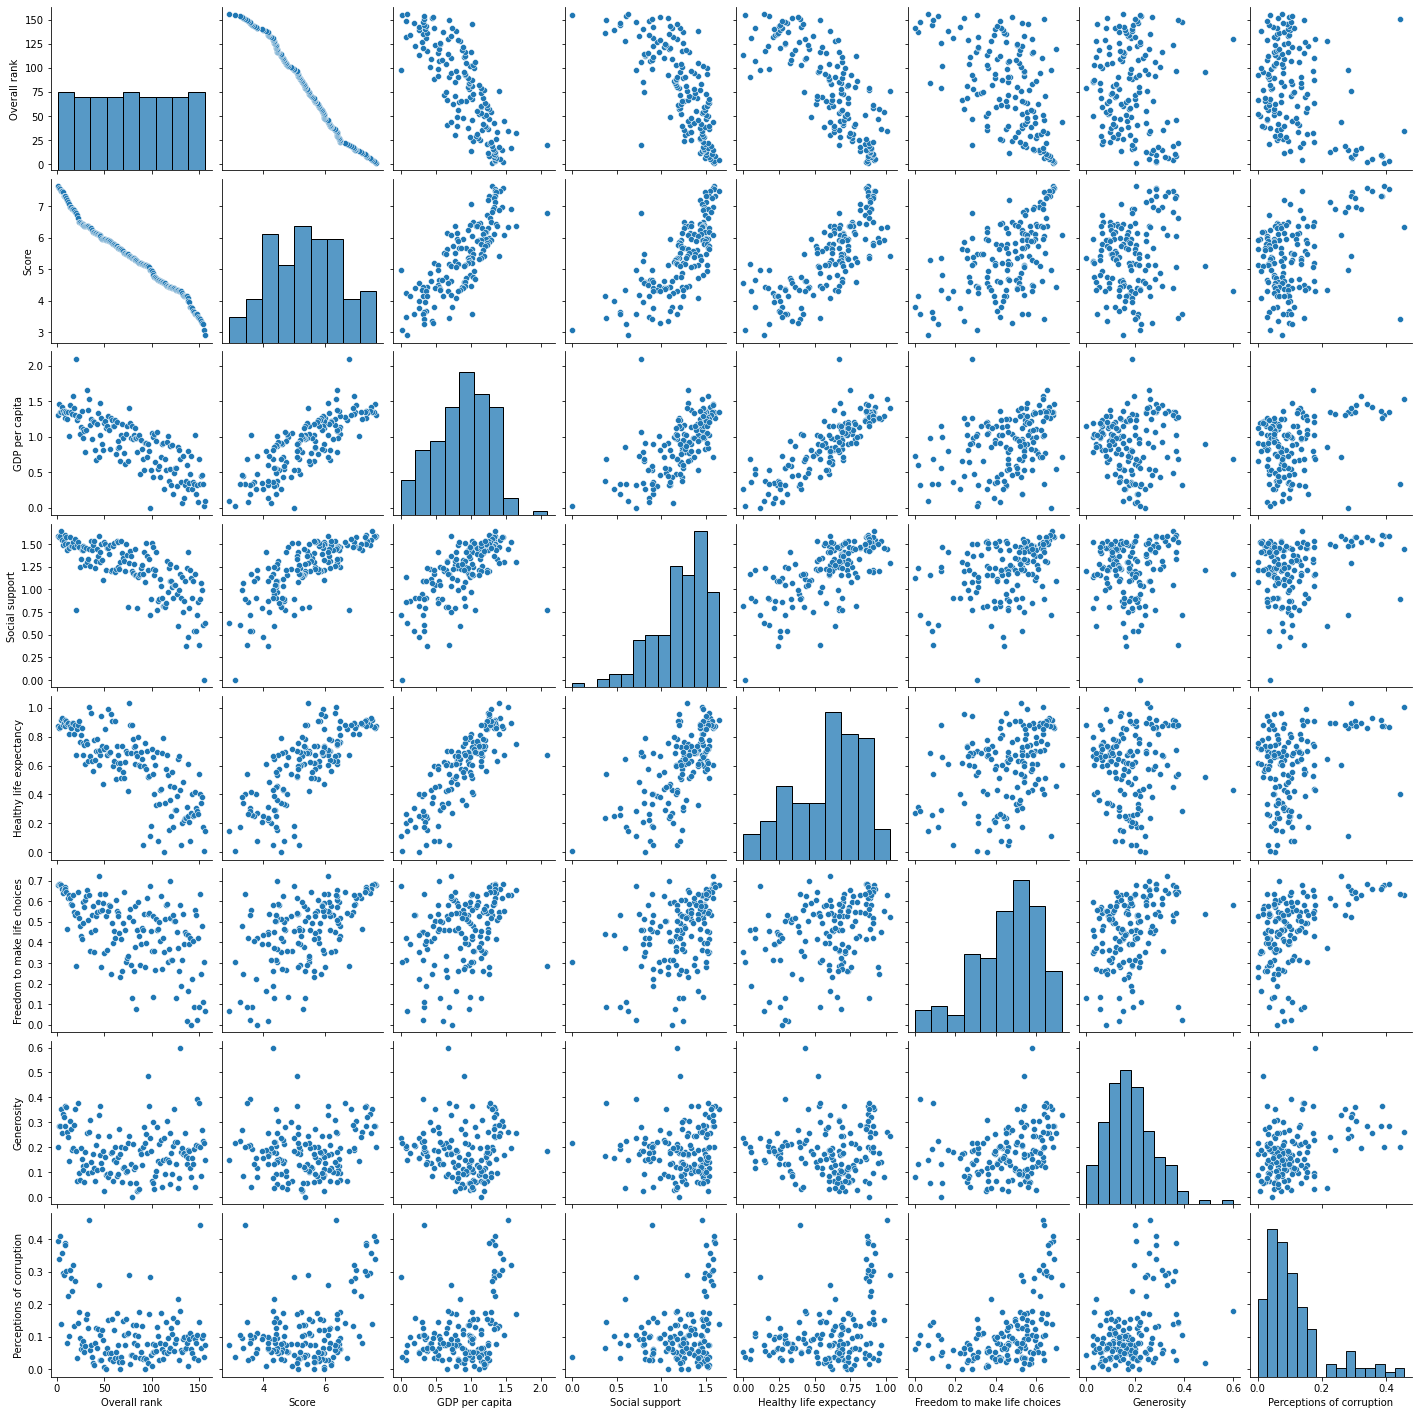

In [93]:
sns.pairplot(df4)

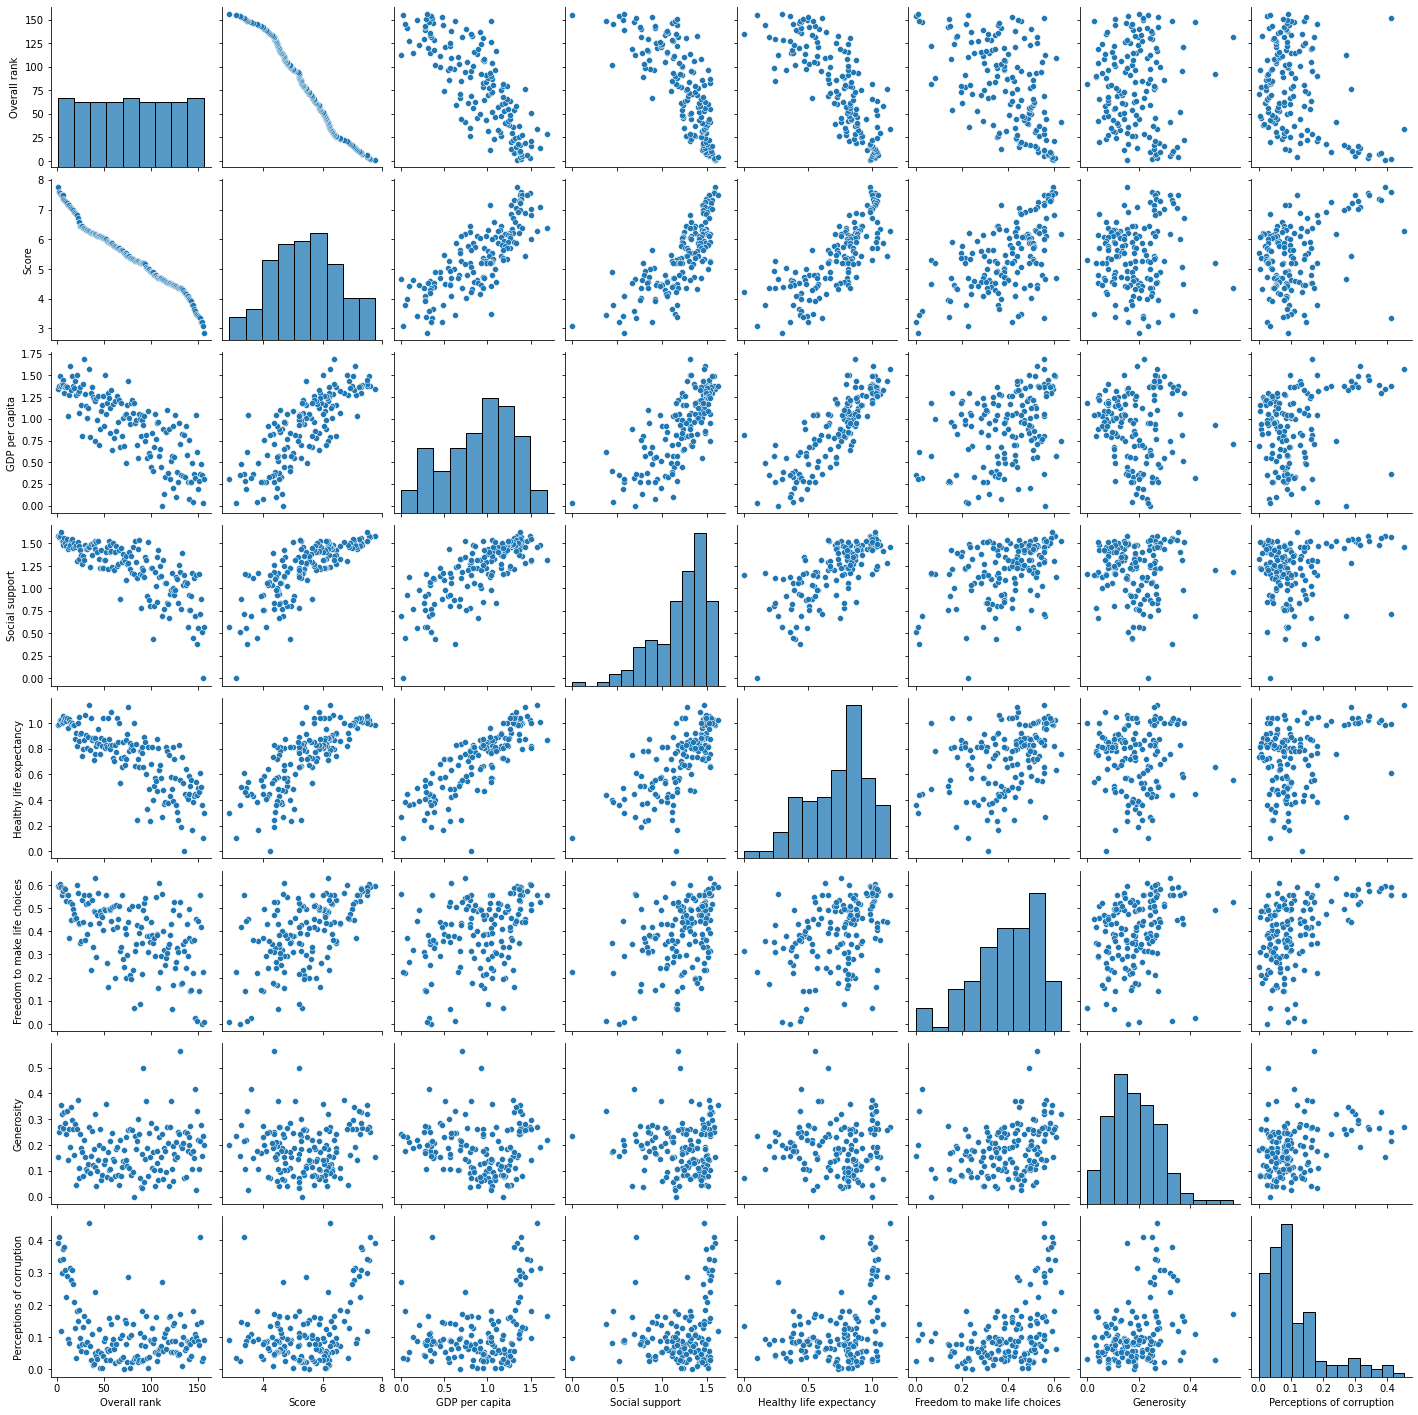

In [94]:
sns.pairplot(df5)

In [125]:
df4

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

In [112]:
df.groupby("Country")[["Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)",
                       "Freedom","Trust (Government Corruption)","Generosity"
                       ]].mean().sort_values("Happiness Score",ascending=False)

Happiness Score  Economy (GDP per Capita)   Family  \
Country                                                           
Switzerland            7.587                   1.39651  1.34951   
Iceland                7.561                   1.30232  1.40223   
Denmark                7.527                   1.32548  1.36058   
Norway                 7.522                   1.45900  1.33095   
Canada                 7.427                   1.32629  1.32261   
...                      ...                       ...      ...   
Rwanda                 3.465                   0.22208  0.77370   
Benin                  3.340                   0.28665  0.35386   
Syria                  3.006                   0.66320  0.47489   
Burundi                2.905                   0.01530  0.41587   
Togo                   2.839                   0.20868  0.13995   

             Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
Country                                                                         
Switzerland                   0.94143  0.66557                        0.41978   
Iceland                       0.94784  0.62877                        0.14145   
Denmark                       0.87464  0.64938                        0.48357   
Norway                        0.88521  0.66973                        0.36503   
Canada                        0.90563  0.63297                        0.32957   
...                               ...      ...                            ...   
Rwanda                        0.42864  0.59201                        0.55191   
Benin                         0.31910  0.48450                        0.08010   
Syria                         0.72193  0.15684                        0.18906   
Burundi                       0.22396  0.11850                        0.10062   
Togo                          0.28443  0.36453                        0.10731   

             Generosity  
Country                  
Switzerland     0.29678  
Iceland         0.43630  
Denmark         0.34139  
Norway          0.34699  
Canada          0.45811  
...                 ...  
Rwanda          0.22628  
Benin           0.18260  
Syria           0.47179  
Burundi         0.19727  
Togo            0.16681  

[158 rows x 7 columns]

In [121]:
df2.groupby("Country")[["Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)",
                       "Freedom","Trust (Government Corruption)","Generosity"
                       ]].mean().sort_values("Happiness Score",ascending=False)

Happiness Score  Economy (GDP per Capita)   Family  \
Country                                                           
Denmark                7.526                   1.44178  1.16374   
Switzerland            7.509                   1.52733  1.14524   
Iceland                7.501                   1.42666  1.18326   
Norway                 7.498                   1.57744  1.12690   
Finland                7.413                   1.40598  1.13464   
...                      ...                       ...      ...   
Benin                  3.484                   0.39499  0.10419   
Afghanistan            3.360                   0.38227  0.11037   
Togo                   3.303                   0.28123  0.00000   
Syria                  3.069                   0.74719  0.14866   
Burundi                2.905                   0.06831  0.23442   

             Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
Country                                                                         
Denmark                       0.79504  0.57941                        0.44453   
Switzerland                   0.86303  0.58557                        0.41203   
Iceland                       0.86733  0.56624                        0.14975   
Norway                        0.79579  0.59609                        0.35776   
Finland                       0.81091  0.57104                        0.41004   
...                               ...      ...                            ...   
Benin                         0.21028  0.39747                        0.06681   
Afghanistan                   0.17344  0.16430                        0.07112   
Togo                          0.24811  0.34678                        0.11587   
Syria                         0.62994  0.06912                        0.17233   
Burundi                       0.15747  0.04320                        0.09419   

             Generosity  
Country                  
Denmark         0.36171  
Switzerland     0.28083  
Iceland         0.47678  
Norway          0.37895  
Finland         0.25492  
...                 ...  
Benin           0.20180  
Afghanistan     0.31268  
Togo            0.17517  
Syria           0.48397  
Burundi         0.20290  

[157 rows x 7 columns]

In [124]:
df3.groupby("Country")[["Happiness.Score","Economy..GDP.per.Capita.","Family","Health..Life.Expectancy.",
                       "Freedom","Trust..Government.Corruption.","Generosity"
                       ]].mean().sort_values("Happiness.Score",ascending=False)

Happiness.Score  Economy..GDP.per.Capita.    Family  \
Country                                                                         
Norway                              7.537                  1.616463  1.533524   
Denmark                             7.522                  1.482383  1.551122   
Iceland                             7.504                  1.480633  1.610574   
Switzerland                         7.494                  1.564980  1.516912   
Finland                             7.469                  1.443572  1.540247   
...                                   ...                       ...       ...   
Rwanda                              3.471                  0.368746  0.945707   
Syria                               3.462                  0.777153  0.396103   
Tanzania                            3.349                  0.511136  1.041990   
Burundi                             2.905                  0.091623  0.629794   
Central African Republic            2.693                  0.000000  0.000000   

                          Health..Life.Expectancy.   Freedom  \
Country                                                        
Norway                                    0.796667  0.635423   
Denmark                                   0.792566  0.626007   
Iceland                                   0.833552  0.627163   
Switzerland                               0.858131  0.620071   
Finland                                   0.809158  0.617951   
...                                            ...       ...   
Rwanda                                    0.326425  0.581844   
Syria                                     0.500533  0.081539   
Tanzania                                  0.364509  0.390018   
Burundi                                   0.151611  0.059901   
Central African Republic                  0.018773  0.270842   

                          Trust..Government.Corruption.  Generosity  
Country                                                              
Norway                                         0.315964    0.362012  
Denmark                                        0.400770    0.355280  
Iceland                                        0.153527    0.475540  
Switzerland                                    0.367007    0.290549  
Finland                                        0.382612    0.245483  
...                                                 ...         ...  
Rwanda                                         0.455220    0.252756  
Syria                                          0.151347    0.493664  
Tanzania                                       0.066035    0.354256  
Burundi                                        0.084148    0.204435  
Central African Republic                       0.056565    0.280876  

[155 rows x 7 columns]

In [132]:
df4.groupby("Country or region")[["Score","GDP per capita","Social support","Healthy life expectancy",
                       "Freedom to make life choices","Perceptions of corruption","Generosity"
                       ]].mean().sort_values("Score",ascending=False)

Score  GDP per capita  Social support  \
Country or region                                                 
Finland                   7.632           1.305           1.592   
Norway                    7.594           1.456           1.582   
Denmark                   7.555           1.351           1.590   
Iceland                   7.495           1.343           1.644   
Switzerland               7.487           1.420           1.549   
...                         ...             ...             ...   
Yemen                     3.355           0.442           1.073   
Tanzania                  3.303           0.455           0.991   
South Sudan               3.254           0.337           0.608   
Central African Republic  3.083           0.024           0.000   
Burundi                   2.905           0.091           0.627   

                          Healthy life expectancy  \
Country or region                                   
Finland                                     0.874   
Norway                                      0.861   
Denmark                                     0.868   
Iceland                                     0.914   
Switzerland                                 0.927   
...                                           ...   
Yemen                                       0.343   
Tanzania                                    0.381   
South Sudan                                 0.177   
Central African Republic                    0.010   
Burundi                                     0.145   

                          Freedom to make life choices  \
Country or region                                        
Finland                                          0.681   
Norway                                           0.686   
Denmark                                          0.683   
Iceland                                          0.677   
Switzerland                                      0.660   
...                                                ...   
Yemen                                            0.244   
Tanzania                                         0.481   
South Sudan                                      0.112   
Central African Republic                         0.305   
Burundi                                          0.065   

                          Perceptions of corruption  Generosity  
Country or region                                                
Finland                                       0.393       0.202  
Norway                                        0.340       0.286  
Denmark                                       0.408       0.284  
Iceland                                       0.138       0.353  
Switzerland                                   0.357       0.256  
...                                             ...         ...  
Yemen                                         0.064       0.083  
Tanzania                                      0.097       0.270  
South Sudan                                   0.106       0.224  
Central African Republic                      0.038       0.218  
Burundi                                       0.076       0.149  

[156 rows x 7 columns]

In [134]:
df5.groupby("Country or region")[["Score","GDP per capita","Social support","Healthy life expectancy",
                       "Freedom to make life choices","Perceptions of corruption","Generosity"
                       ]].mean().sort_values("Score",ascending=False)

Score  GDP per capita  Social support  \
Country or region                                                 
Finland                   7.769           1.340           1.587   
Denmark                   7.600           1.383           1.573   
Norway                    7.554           1.488           1.582   
Iceland                   7.494           1.380           1.624   
Netherlands               7.488           1.396           1.522   
...                         ...             ...             ...   
Rwanda                    3.334           0.359           0.711   
Tanzania                  3.231           0.476           0.885   
Afghanistan               3.203           0.350           0.517   
Central African Republic  3.083           0.026           0.000   
South Sudan               2.853           0.306           0.575   

                          Healthy life expectancy  \
Country or region                                   
Finland                                     0.986   
Denmark                                     0.996   
Norway                                      1.028   
Iceland                                     1.026   
Netherlands                                 0.999   
...                                           ...   
Rwanda                                      0.614   
Tanzania                                    0.499   
Afghanistan                                 0.361   
Central African Republic                    0.105   
South Sudan                                 0.295   

                          Freedom to make life choices  \
Country or region                                        
Finland                                          0.596   
Denmark                                          0.592   
Norway                                           0.603   
Iceland                                          0.591   
Netherlands                                      0.557   
...                                                ...   
Rwanda                                           0.555   
Tanzania                                         0.417   
Afghanistan                                      0.000   
Central African Republic                         0.225   
South Sudan                                      0.010   

                          Perceptions of corruption  Generosity  
Country or region                                                
Finland                                       0.393       0.153  
Denmark                                       0.410       0.252  
Norway                                        0.341       0.271  
Iceland                                       0.118       0.354  
Netherlands                                   0.298       0.322  
...                                             ...         ...  
Rwanda                                        0.411       0.217  
Tanzania                                      0.147       0.276  
Afghanistan                                   0.025       0.158  
Central African Republic                      0.035       0.235  
South Sudan                                   0.091       0.202  

[156 rows x 7 columns]

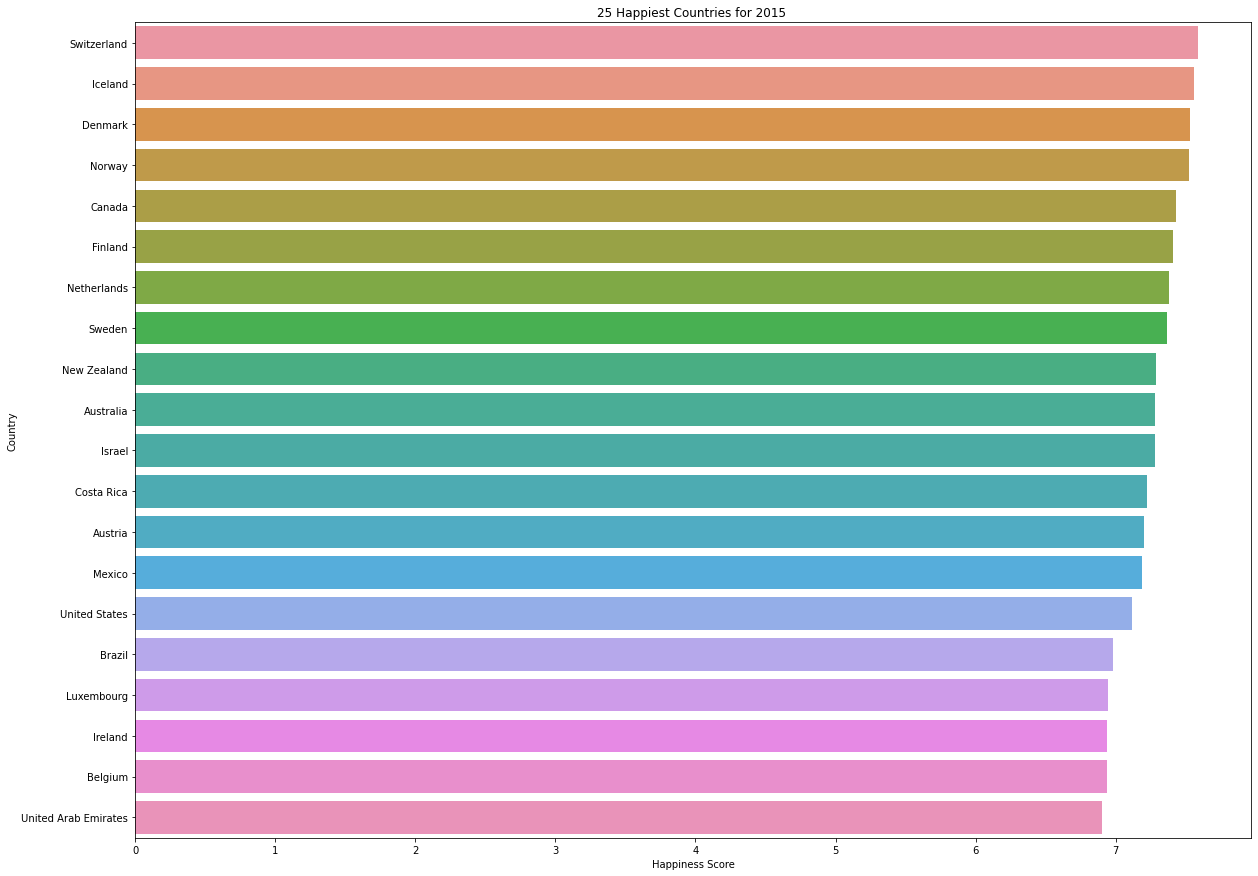

In [207]:
a=df["Happiness Score"][:20]
b=df["Country"][:20]
plt.figure(figsize=(20,15))
sns.barplot(data=df,x=a,y=b)
plt.title("25 Happiest Countries for 2015 ");

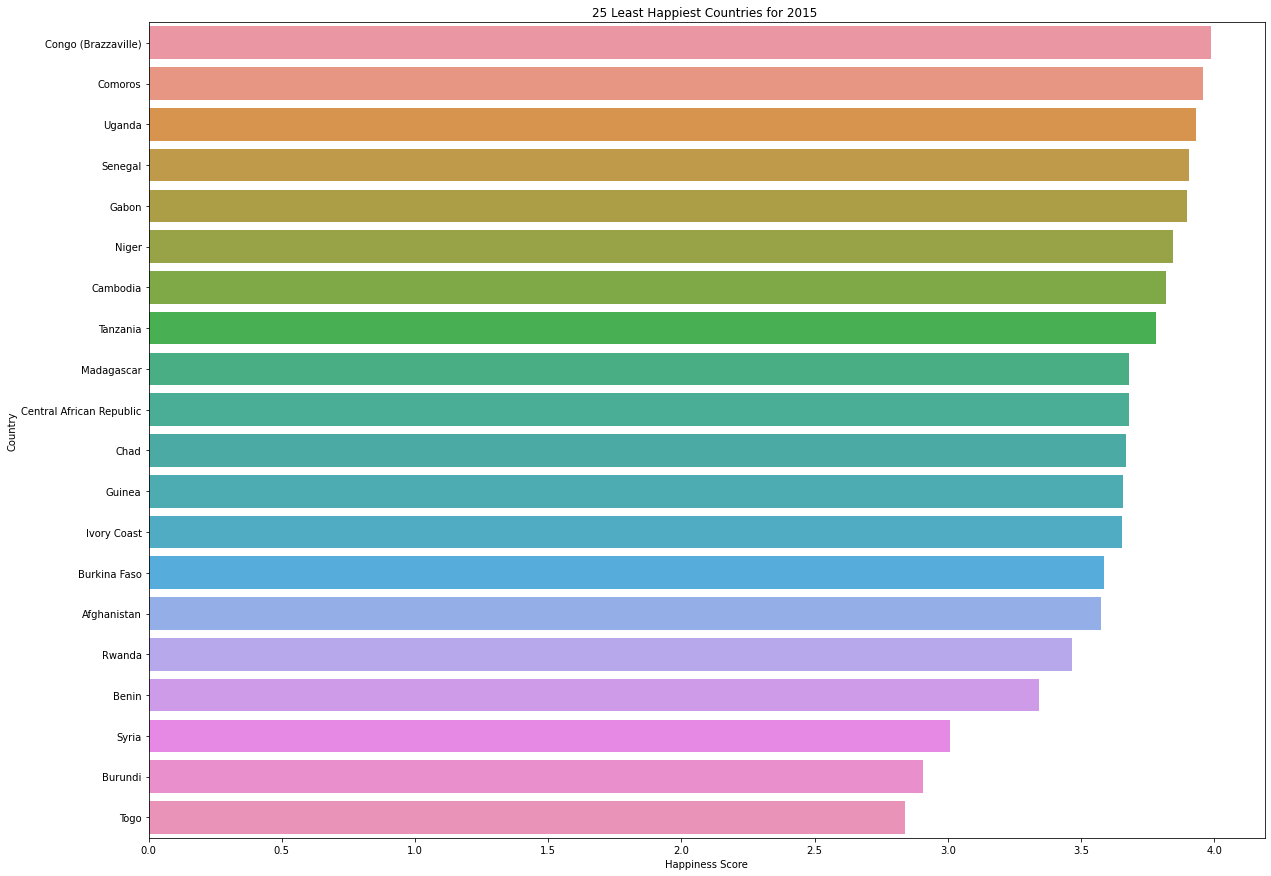

In [206]:
a=df["Happiness Score"].sort_values(ascending=True)[:20]
b=df["Country"][-20:]
plt.figure(figsize=(20,15))
sns.barplot(data=df,x=a,y=b)
plt.title("25 Least Happiest Countries for 2015 ");

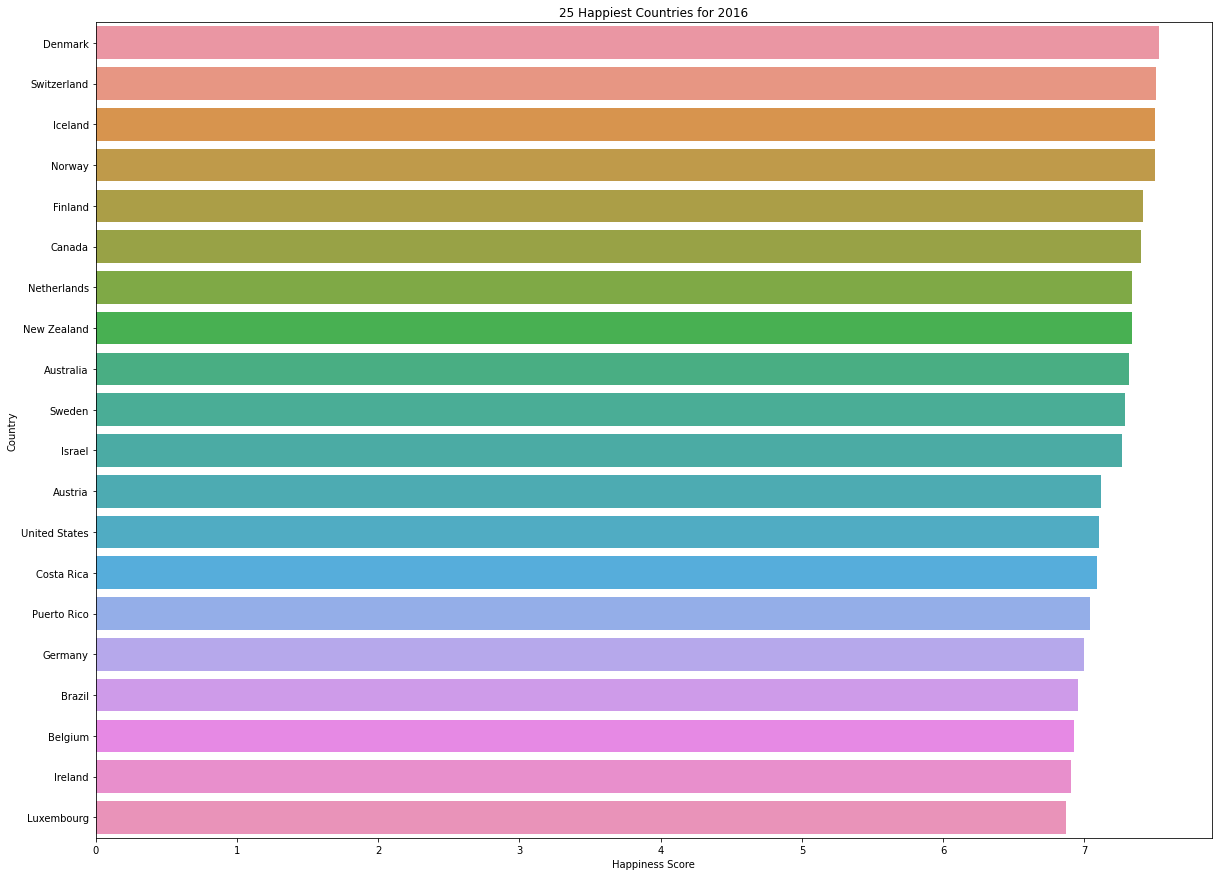

In [205]:
a=df2["Happiness Score"][:20]
b=df2["Country"][:20]
plt.figure(figsize=(20,15))
sns.barplot(data=df2,x=a,y=b)
plt.title("25 Happiest Countries for 2016");

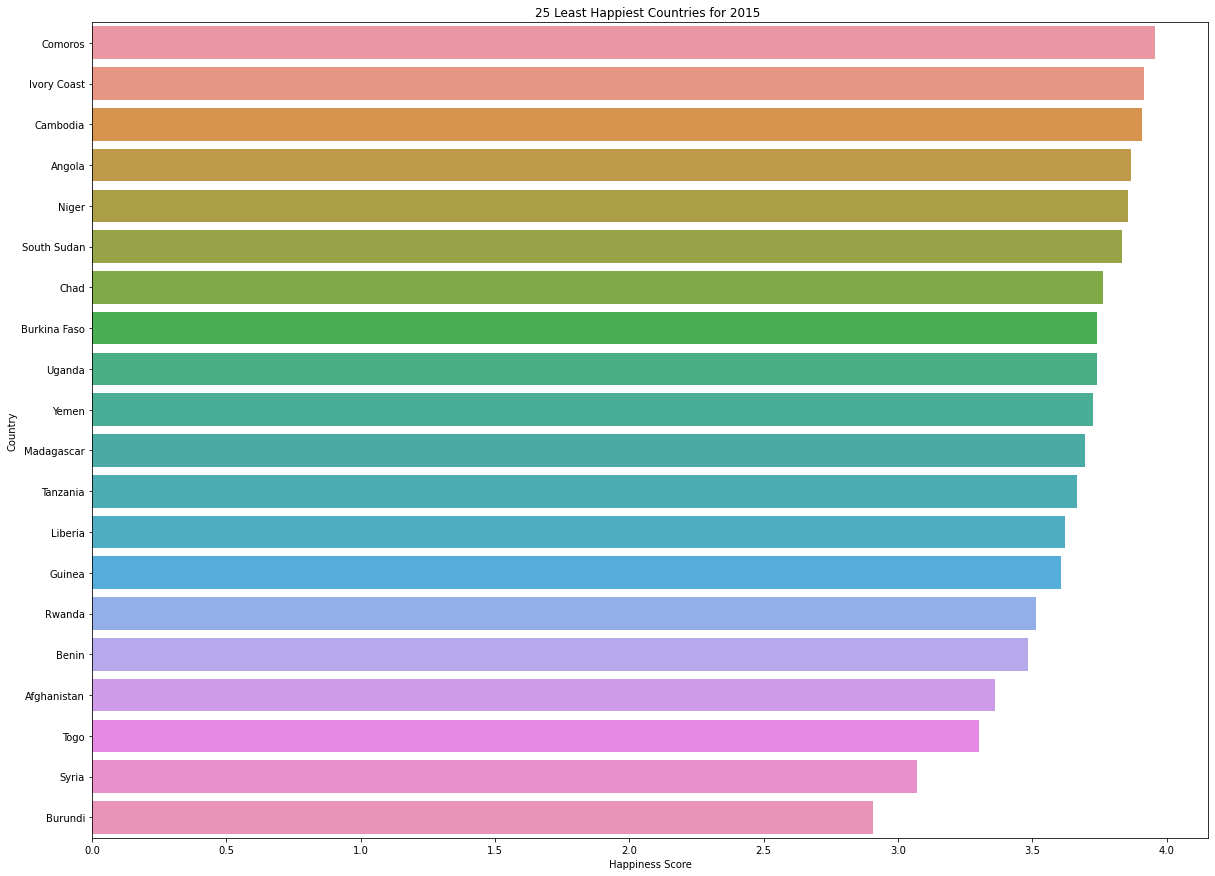

In [204]:
a=df2["Happiness Score"].sort_values(ascending=True)[:20]
b=df2["Country"][-20:]
plt.figure(figsize=(20,15))
sns.barplot(data=df,x=a,y=b)
plt.title("25 Least Happiest Countries for 2015 ");

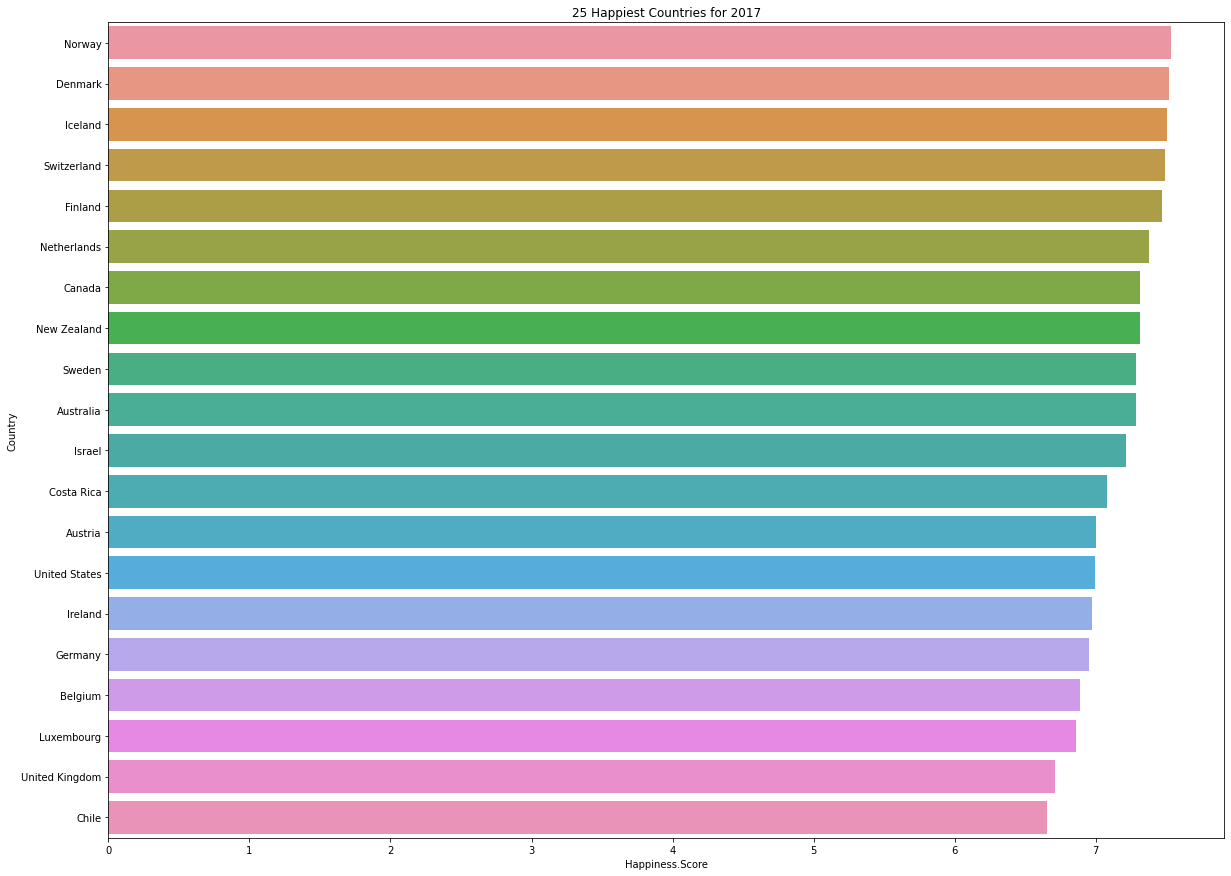

In [203]:
a=df3["Happiness.Score"][:20]
b=df3["Country"][:20]
plt.figure(figsize=(20,15))
sns.barplot(data=df3,x=a,y=b)
plt.title("25 Happiest Countries for 2017");

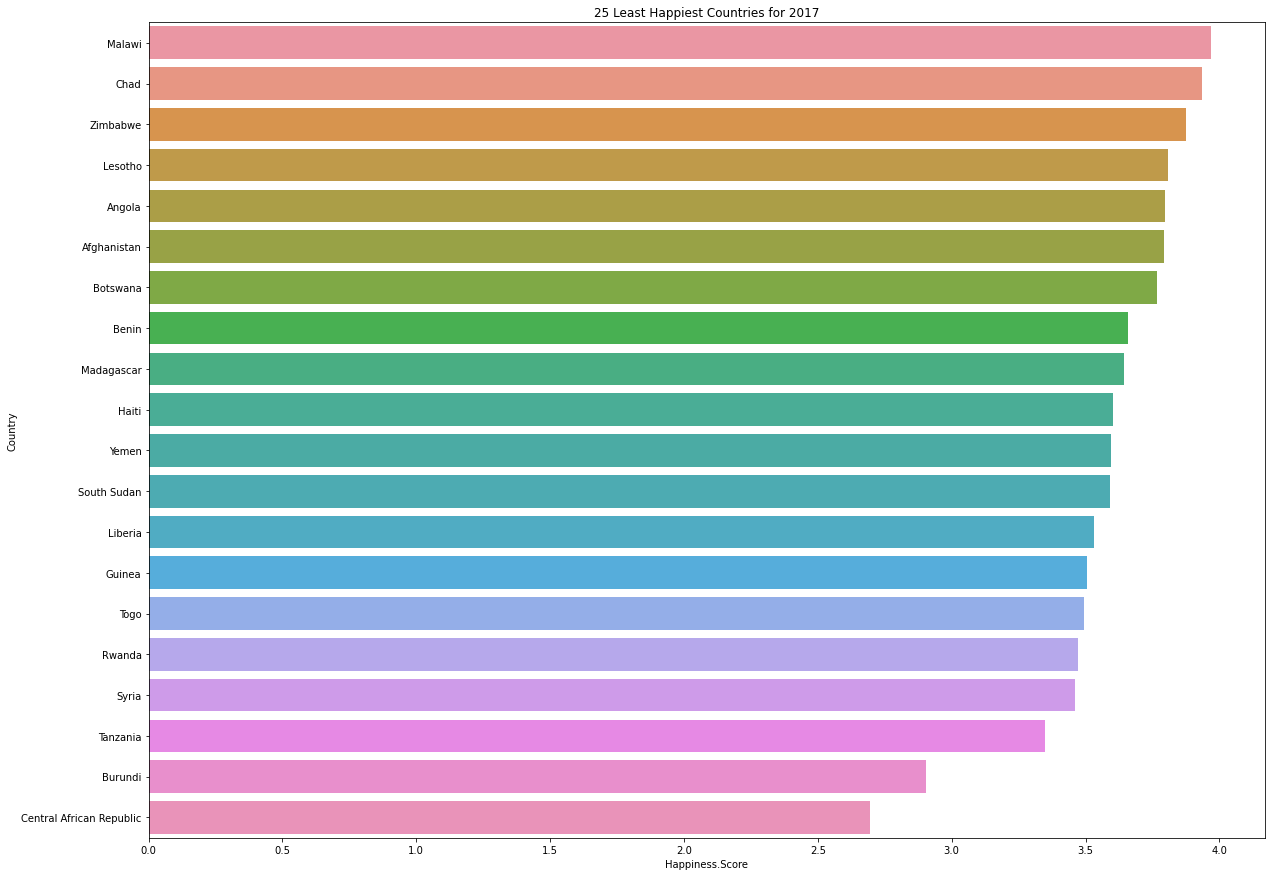

In [202]:
a=df3["Happiness.Score"].sort_values(ascending=True)[:20]
b=df3["Country"][-20:]
plt.figure(figsize=(20,15))
sns.barplot(data=df3,x=a,y=b)
plt.title("25 Least Happiest Countries for 2017");

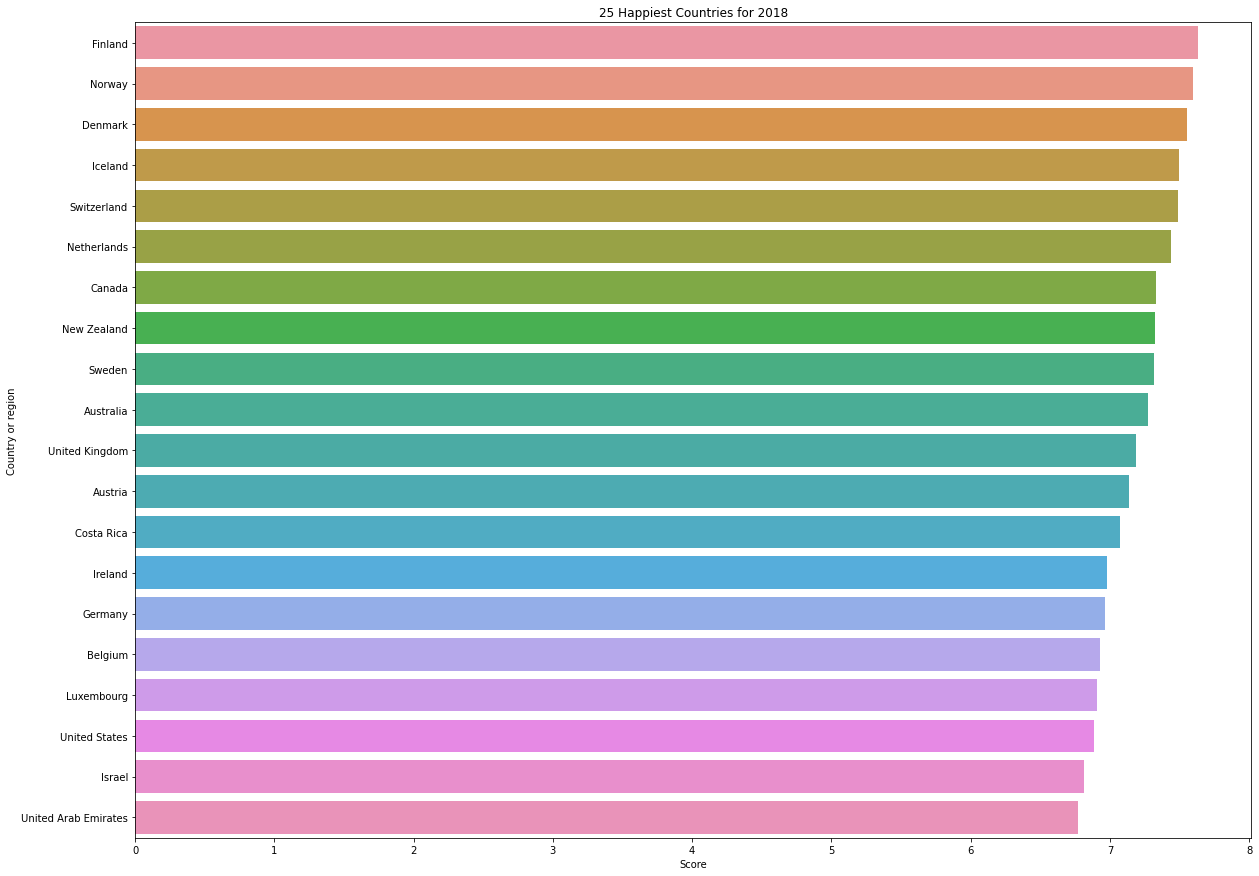

In [201]:
a=df4["Score"][:20]
b=df4["Country or region"][:20]
plt.figure(figsize=(20,15))
sns.barplot(data=df4,x=a,y=b)
plt.title("25 Happiest Countries for 2018");

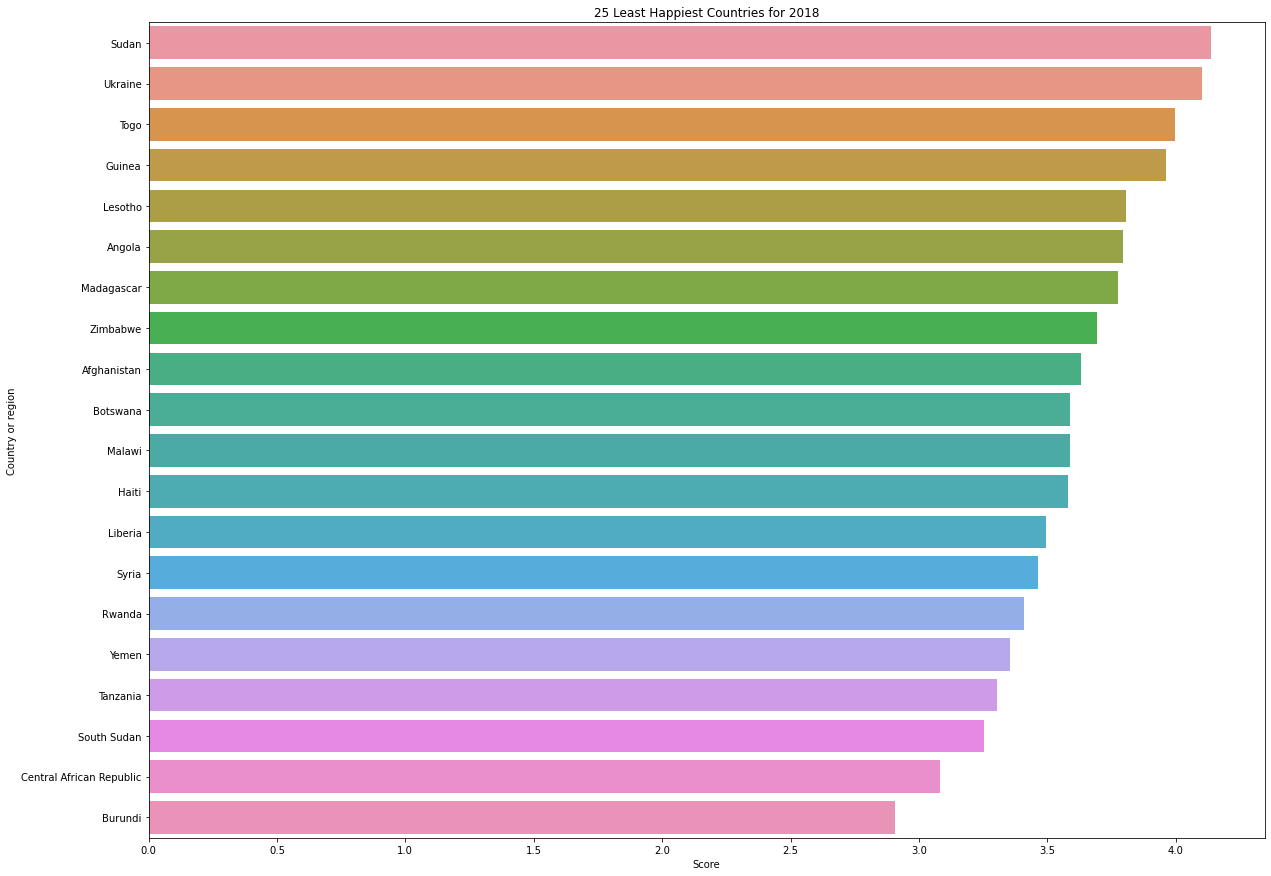

In [200]:
a=df4["Score"].sort_values(ascending=True)[:20]
b=df4["Country or region"][-20:]
plt.figure(figsize=(20,15))
sns.barplot(data=df4,x=a,y=b)
plt.title("25 Least Happiest Countries for 2018");

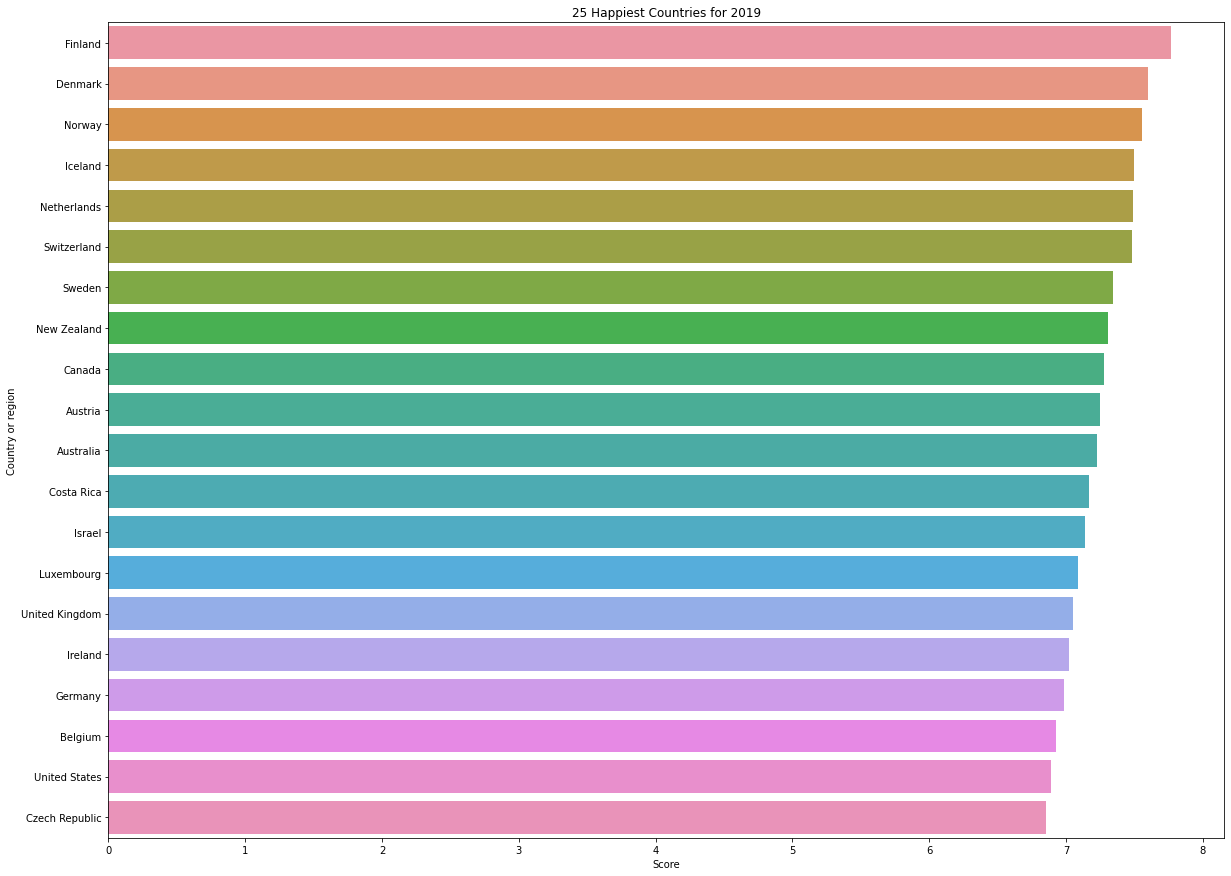

In [198]:
a=df5["Score"][:20]
b=df5["Country or region"][:20]
plt.figure(figsize=(20,15))
sns.barplot(data=df5,x=a,y=b)
plt.title("25 Happiest Countries for 2019");

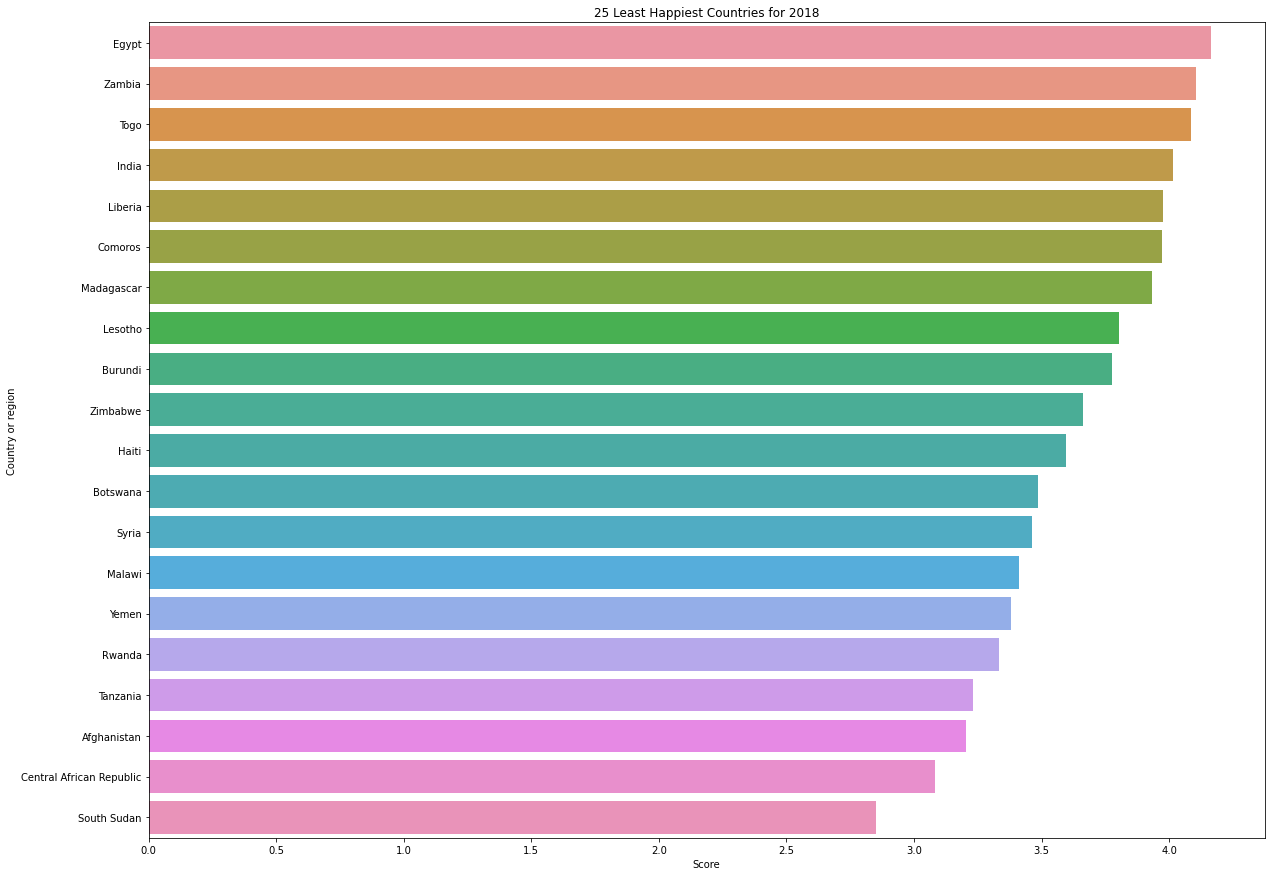

In [199]:
a=df5["Score"].sort_values(ascending=True)[:20]
b=df5["Country or region"][-20:]
plt.figure(figsize=(20,15))
sns.barplot(data=df4,x=a,y=b)
plt.title("25 Least Happiest Countries for 2018");

In [192]:
df3.rename(columns={'Happiness.Rank':'Happiness Rank',
                       'Happiness.Score':'Happiness Score',
                      'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                      'Health..Life.Expectancy.':'Health (Life Expectancy)',
                      'Trust..Government.Corruption.':'Trust (Government Corruption)',
                      'Dystopia.Residual':'Dystopia Residual'},inplace=True)
df4.rename(columns={'Overall rank':'Happiness Rank',
                      'Score':'Happiness Score',
                      'GDP per capita':'Economy (GDP per Capita)',
                      'Healthy life expectancy':'Health (Life Expectancy)',
                      'Perceptions of corruption':'Trust (Government Corruption)',
                      'Freedom to make life choices':'Freedom',
                      'Country or region':'Country'},inplace=True)
df5.rename(columns={'Overall rank':'Happiness Rank',
                      'Score':'Happiness Score',
                      'GDP per capita':'Economy (GDP per Capita)',
                      'Healthy life expectancy':'Health (Life Expectancy)',
                      'Perceptions of corruption':'Trust (Government Corruption)',
                      'Freedom to make life choices':'Freedom',
                      'Country or region':'Country'},inplace=True)

In [193]:
data=pd.concat([df,df2,df3,df4,df5],axis=0,ignore_index=True)

In [194]:
data

Country          Region  Happiness Rank  \
0                 Switzerland  Western Europe               1   
1                     Iceland  Western Europe               2   
2                     Denmark  Western Europe               3   
3                      Norway  Western Europe               4   
4                      Canada   North America               5   
..                        ...             ...             ...   
777                    Rwanda             NaN             152   
778                  Tanzania             NaN             153   
779               Afghanistan             NaN             154   
780  Central African Republic             NaN             155   
781               South Sudan             NaN             156   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
777            3.334             NaN                   0.35900      NaN   
778            3.231             NaN                   0.47600      NaN   
779            3.203             NaN                   0.35000      NaN   
780            3.083             NaN                   0.02600      NaN   
781            2.853             NaN                   0.30600      NaN   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
777                   0.61400  0.55500                        0.41100   
778                   0.49900  0.41700                        0.14700   
779                   0.36100  0.00000                        0.02500   
780                   0.10500  0.22500                        0.03500   
781                   0.29500  0.01000                        0.09100   

     Generosity  Dystopia Residual  Lower Confidence Interval  \
0       0.29678            2.51738                        NaN   
1       0.43630            2.70201                        NaN   
2       0.34139            2.49204                        NaN   
3       0.34699            2.46531                        NaN   
4       0.45811            2.45176                        NaN   
..          ...                ...                        ...   
777     0.21700                NaN                        NaN   
778     0.27600                NaN                        NaN   
779     0.15800                NaN                        NaN   
780     0.23500                NaN                        NaN   
781     0.20200                NaN                        NaN   

     Upper Confidence Interval  Whisker.high  Whisker.low  Social support  
0                          NaN           NaN          NaN             NaN  
1                          NaN           NaN          NaN             NaN  
2                          NaN           NaN          NaN             NaN  
3                          NaN           NaN          NaN             NaN  
4                          NaN           NaN          NaN             NaN  
..                         ...           ...          ...             ...  
777                        NaN           NaN          NaN           0.711  
778                        NaN           NaN          NaN           0.885 